In [1]:
import pandas as pd
import numpy as np
import random as rnd
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df, test_df] # hna sema combine drwk rahi fiha les 2 datasets te3na 

print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# affiche tous les informations de train df 

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# affiche tous les informations de test train 

test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [7]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
train_df.shape


(891, 12)

In [16]:
test_df.shape

(418, 11)

In [17]:
train_df.dtypes.value_counts()


int64      5
object     5
float64    2
Name: count, dtype: int64

In [18]:
test_df.dtypes.value_counts()

object     5
int64      4
float64    2
Name: count, dtype: int64

In [19]:
# hdi bch te3tina missing values apres ndiroulha visualisation be sns
print(train_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


<Axes: >

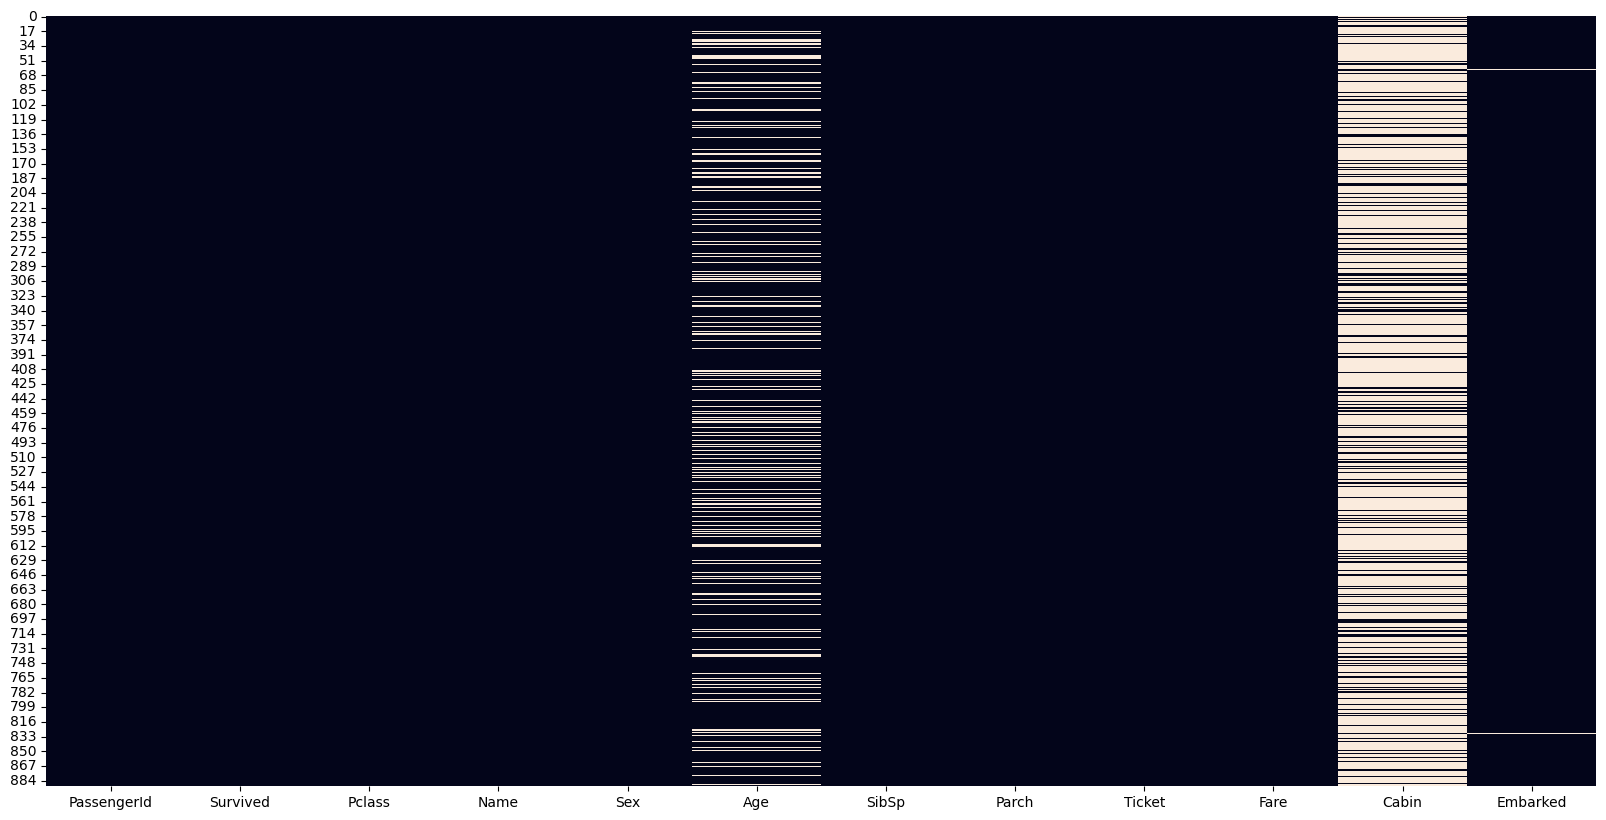

In [21]:
plt.figure(figsize=(20,10))
sns.heatmap(train_df.isna(), cbar=False)

<Axes: >

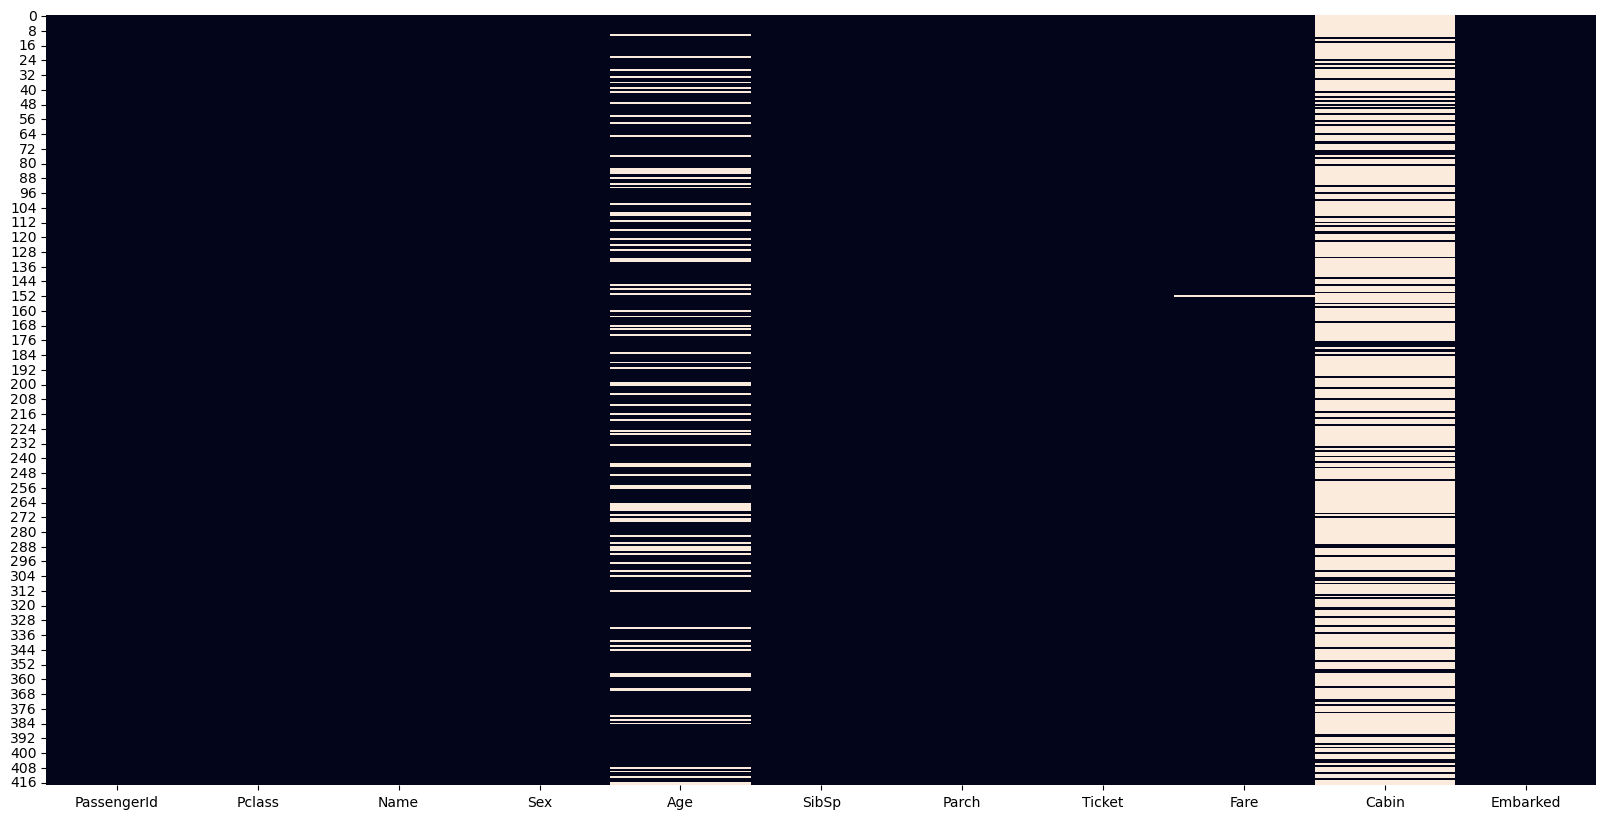

In [22]:
plt.figure(figsize=(20,10))
sns.heatmap(test_df.isna(), cbar=False)

In [23]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


AttributeError: 'numpy.int64' object has no attribute 'startswith'

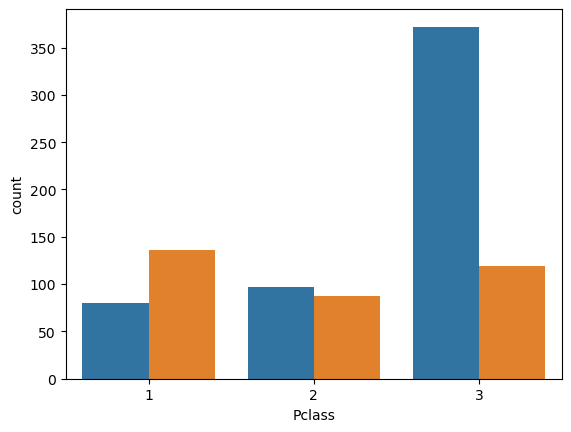

In [25]:
sns.countplot(x='Pclass', hue='Survived', data=train_df)
plt.title('Passenger Class vs Survival Count')
plt.xlabel('Passenger Class')
plt.ylabel('Number of Passengers')
plt.legend(title='Survived', loc='upper right', labels=['Not Survived', 'Survived'])
plt.show()


In [26]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


AttributeError: 'numpy.int64' object has no attribute 'startswith'

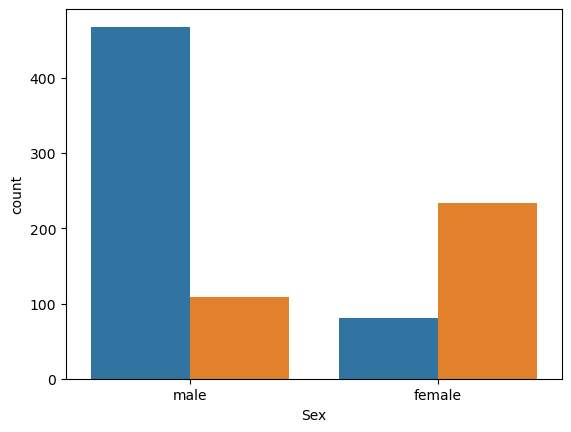

In [28]:
sns.countplot(x='Sex', hue='Survived', data=train_df)
plt.title('Passenger Class vs Survival Count')
plt.xlabel('Passenger Class')
plt.ylabel('Number of Passengers')
plt.legend(title='Sex', loc='upper right', labels=['Not Survived', 'Survived'])
plt.show()

In [29]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


AttributeError: 'numpy.int64' object has no attribute 'startswith'

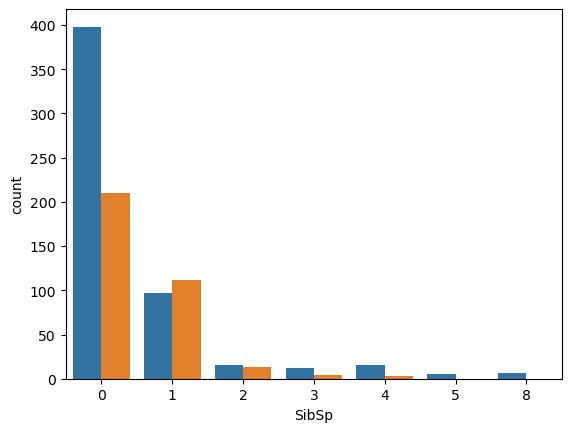

In [31]:
sns.countplot(x='SibSp', hue='Survived', data=train_df)
plt.title('Passenger Class vs Survival Count')
plt.xlabel('Passenger Class')
plt.ylabel('Number of Passengers')
plt.legend(title='SibSp', loc='upper right', labels=['Not Survived', 'Survived'])
plt.show()

In [33]:
train_df[['Parch','Survived']].groupby(['Parch'],as_index=False).mean().sort_values(by='Parch',ascending=True)

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


AttributeError: 'numpy.int64' object has no attribute 'startswith'

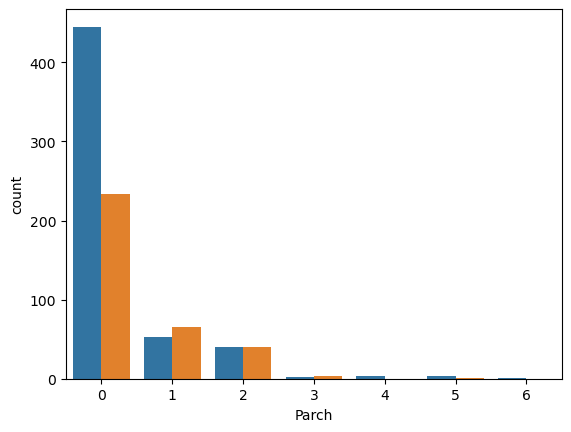

In [34]:
sns.countplot(x='Parch', hue='Survived', data=train_df)
plt.title('Passenger Class vs Survival Count')
plt.xlabel('Passenger Class')
plt.ylabel('Number of Passengers')
plt.legend(title='Parch', loc='upper right', labels=['Not Survived', 'Survived'])
plt.show()

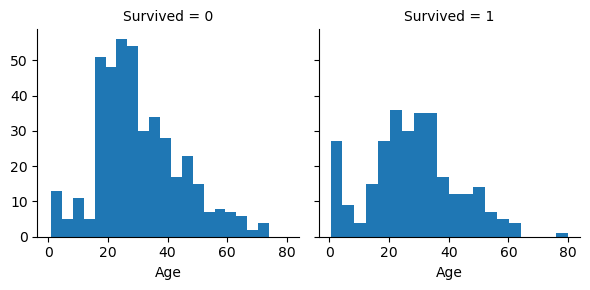

In [35]:
# hna rah ye3tina histogram te3 age li 3achou w li matou 
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

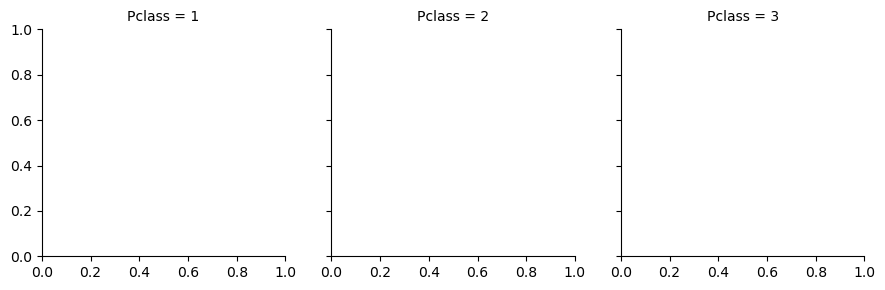

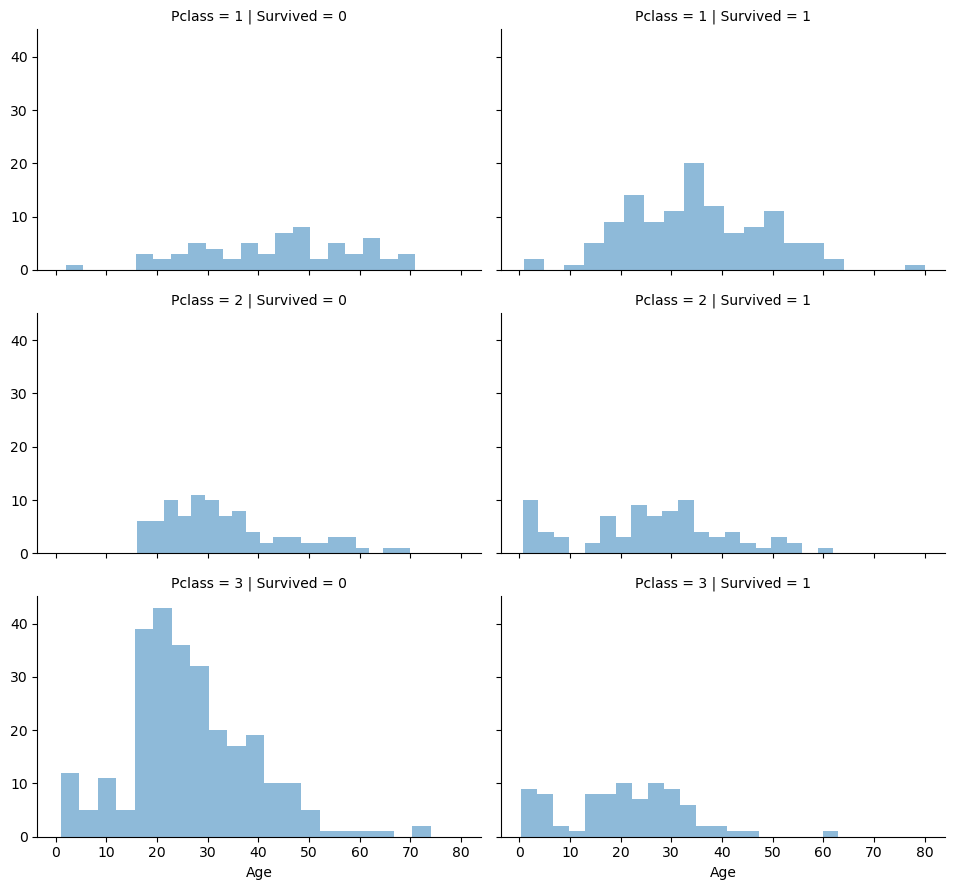

In [36]:
grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [37]:
df = train_df.drop('PassengerId',axis=1)
df = train_df.drop('Name',axis=1)
df = train_df.drop('Ticket',axis=1)
df = train_df.drop('Embarked', axis=1)

In [38]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [44]:
train_df.shape

(891, 12)

In [56]:
for dataset in train_df:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0}).astype(int)

train_df.head()

TypeError: string indices must be integers, not 'str'